# Capstone Project - Car Accident Severity

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

In [6]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


## Data Processing

In [7]:
#load in Dataset
df_acc = pd.read_csv(r'D:\Eric\Python\IBM Certificate\Capstone\UK road accident\accidents0515.csv')


In [8]:
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780653 entries, 0 to 1780652
Data columns (total 32 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   Location_Easting_OSGR                        float64
 2   Location_Northing_OSGR                       float64
 3   Longitude                                    float64
 4   Latitude                                     float64
 5   Police_Force                                 int64  
 6   Accident_Severity                            int64  
 7   Number_of_Vehicles                           int64  
 8   Number_of_Casualties                         int64  
 9   Date                                         object 
 10  Day_of_Week                                  int64  
 11  Time                                         object 
 12  Local_Authority_(District)                   int64  
 13  Local_Author

In [9]:
df_acc.isnull().sum()

Accident_Index                                      0
Location_Easting_OSGR                             138
Location_Northing_OSGR                            138
Longitude                                         138
Latitude                                          138
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                              151
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail             

In [10]:
#Drop columns with greater than 10,000 null values
df_acc.drop(columns=['LSOA_of_Accident_Location', 'Location_Easting_OSGR','Location_Northing_OSGR','LSOA_of_Accident_Location','Carriageway_Hazards','Did_Police_Officer_Attend_Scene_of_Accident','Special_Conditions_at_Site'
], inplace = True,axis= 1)

In [11]:
#drop NA rows
df_acc.dropna(inplace = True)


In [12]:
# Identifying Missing Values
df_acc.isin([-1]).sum(axis=0)

Accident_Index                                  0
Longitude                                       1
Latitude                                        0
Police_Force                                    0
Accident_Severity                               0
Number_of_Vehicles                              0
Number_of_Casualties                            0
Date                                            0
Day_of_Week                                     0
Time                                            0
Local_Authority_(District)                      0
Local_Authority_(Highway)                       0
1st_Road_Class                                  0
1st_Road_Number                                 2
Road_Type                                       0
Speed_limit                                     0
Junction_Detail                                17
Junction_Control                           641231
2nd_Road_Class                             732706
2nd_Road_Number                             16814


In [13]:
#Drop columns with greater than 10,000 missing values
df_acc.drop(columns=['Junction_Control','2nd_Road_Class','2nd_Road_Number'], inplace = True, axis=1)

In [14]:
#Drop missing values
df_acc.drop(df_acc.loc[df_acc['Longitude']==-1].index, inplace=True)
df_acc.drop(df_acc.loc[df_acc['1st_Road_Number']==-1].index, inplace=True)
df_acc.drop(df_acc.loc[df_acc['Junction_Detail']==-1].index, inplace=True)
df_acc.drop(df_acc.loc[df_acc['Pedestrian_Crossing-Human_Control']==-1].index, inplace=True)
df_acc.drop(df_acc.loc[df_acc['Pedestrian_Crossing-Physical_Facilities']==-1].index, inplace=True)
df_acc.drop(df_acc.loc[df_acc['Weather_Conditions']==-1].index, inplace=True)
df_acc.drop(df_acc.loc[df_acc['Road_Surface_Conditions']==-1].index, inplace=True)

In [15]:
df_acc.isin([-1]).sum(axis=0)

Accident_Index                             0
Longitude                                  0
Latitude                                   0
Police_Force                               0
Accident_Severity                          0
Number_of_Vehicles                         0
Number_of_Casualties                       0
Date                                       0
Day_of_Week                                0
Time                                       0
Local_Authority_(District)                 0
Local_Authority_(Highway)                  0
1st_Road_Class                             0
1st_Road_Number                            0
Road_Type                                  0
Speed_limit                                0
Junction_Detail                            0
Pedestrian_Crossing-Human_Control          0
Pedestrian_Crossing-Physical_Facilities    0
Light_Conditions                           0
Weather_Conditions                         0
Road_Surface_Conditions                    0
Urban_or_R

In [16]:
df_acc.shape

(1777621, 23)

## Data Visualization

In [17]:
#Count the frequency of each Accident_Severity category
acc_sev=df_acc[['Accident_Severity']]
acc_sev=acc_sev.groupby(by=['Accident_Severity'],axis=0).size()
acc_sev=pd.DataFrame(acc_sev)
acc_sev.columns=['Counts']
acc_sev['%']=acc_sev.Counts/acc_sev.Counts.sum()
acc_sev

,Counts,%
Accident_Severity,,
1,22973,0.012923
2,241751,0.135997
3,1512897,0.851080


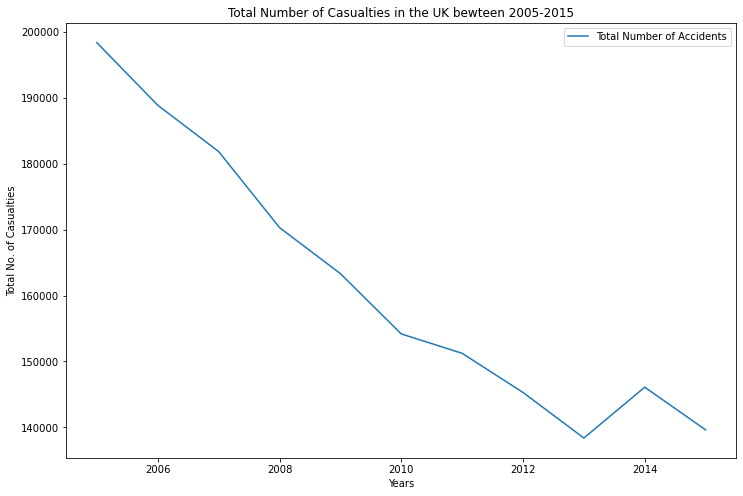

In [18]:
#Total number of calsuties between 2005-2015
import datetime
df_acc['Year'] = pd.DatetimeIndex(df_acc['Date']).year
cas_year=pd.DataFrame(df_acc['Year'].value_counts())
cas_year.reset_index(inplace = True)
cas_year.sort_values(by=['index'],inplace= True)
cas_year.columns=['Year', "Total Number of Accidents"]
cas_year.set_index('Year',inplace=True)

cas_year.plot(kind='line',
              figsize=(12, 8),
             )
plt.title('Total Number of Casualties in the UK bewteen 2005-2015')
plt.ylabel('Total No. of Casualties')
plt.xlabel('Years')
plt.show()

C:\Users\owner\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


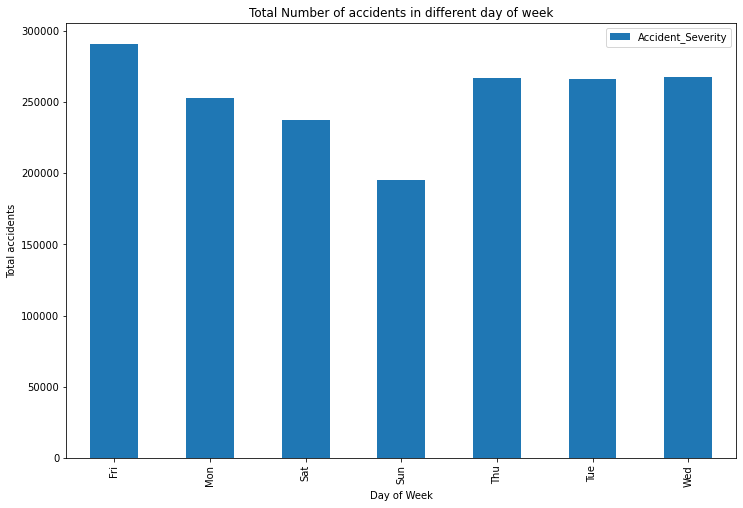

In [19]:
#Relationship between Day_of_Week and Accident_Severity 
dow_sev=df_acc[["Accident_Severity",'Day_of_Week']]
dow_sev['Day_of_Week']=dow_sev['Day_of_Week'].replace([1,2,3,4,5,6,7], ['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])
dow_sev_tot=dow_sev.groupby(['Day_of_Week']).count()

dow_sev_tot.plot(kind='bar',
                figsize=(12, 8),
                 )
plt.title('Total Number of accidents in different day of week')
plt.ylabel('Total accidents')
plt.xlabel('Day of Week')
plt.show()

In [20]:
# Create a function to categorize accident severity
def category(accident_severity):
    if accident_severity == 1:
        return 'Fatal'
    elif accident_severity == 2:
        return 'Serious'
    elif accident_severity == 3:
        return 'Slight'
    else:
        return 'Unknown'

In [21]:
# Apply the function and add it as 'Accident_Category' column
df_acc['Accident_Category'] = df_acc['Accident_Severity'].apply(category)

In [22]:
# Relationship between Light_Conditions and Accident_Severity
# Create a pivot table

lc_sev=df_acc[["Accident_Severity",'Light_Conditions','Accident_Category']]

lc_sev_pivot=pd.pivot_table(lc_sev,index=['Light_Conditions'],values=["Accident_Severity"],columns=['Accident_Category'],aggfunc=[len])

lc_sev_pivot

len                 
                  Accident_Severity                 
Accident_Category             Fatal Serious   Slight
Light_Conditions                                    
1                             13482  166810  1121997
4                              4782   51979   292424
5                               157    1239     6778
6                              4310   19257    75263
7                               242    2466    16435

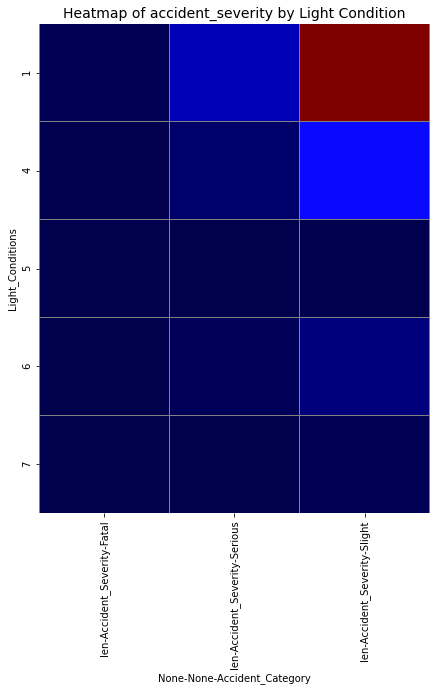

In [23]:
# Using seaborn heatmap
plt.figure(figsize=(7,9))
plt.title('Heatmap of accident_severity by Light Condition', fontsize=14)
sns.heatmap(lc_sev_pivot, cmap='seismic', linecolor='grey',linewidths=0.1, cbar=False)

In [24]:
# Relationship between Weather_Conditions and Accident_Severity
wt_sev=df_acc[["Accident_Severity",'Weather_Conditions','Accident_Category']]
wt_sev_pivot=pd.pivot_table(wt_sev,index=['Weather_Conditions'],values=["Accident_Severity"],columns=['Accident_Category'],aggfunc=[len])

wt_sev_pivot

len                 
                   Accident_Severity                 
Accident_Category              Fatal Serious   Slight
Weather_Conditions                                   
1                              19013  199105  1204195
2                               2215   25513   182691
3                                 96    1211    11090
4                                433    3483    19376
5                                357    3452    22035
6                                 15     273     2018
7                                209    1389     8089
8                                345    4298    34428
9                                290    3027    28975

In [25]:
# Relationship between Road_Sruface_Conditions and Accident_Severity
rsc_sev=df_acc[["Accident_Severity",'Road_Surface_Conditions','Accident_Category']]

rsc_sev_pivot=pd.pivot_table(rsc_sev,index=['Road_Surface_Conditions'],values=["Accident_Severity"],columns=['Accident_Category'],aggfunc=[len])
rsc_sev_pivot

len                 
                        Accident_Severity                 
Accident_Category                   Fatal Serious   Slight
Road_Surface_Conditions                                   
1                                   15408  169874  1040681
2                                    7052   66203   428367
3                                      83    1147    10242
4                                     376    4175    31431
5                                      54     352     2176

In [26]:
# Relationship between Speed_Limit and Accident_Severity

spl_sev=df_acc[["Accident_Severity",'Speed_limit','Accident_Category']]

spl_sev_pivot=pd.pivot_table(spl_sev,index=['Speed_limit'],values=["Accident_Severity"],columns=['Accident_Category'],aggfunc=[len])
spl_sev_pivot

len                    
                  Accident_Severity                    
Accident_Category             Fatal   Serious    Slight
Speed_limit                                            
0                               NaN       NaN       1.0
10                              3.0       2.0      14.0
15                              NaN       1.0      15.0
20                            119.0    3175.0   18711.0
30                           7584.0  141534.0  990453.0
40                           2157.0   19891.0  124038.0
50                           1268.0    8619.0   48549.0
60                           8827.0   52912.0  220067.0
70                           3015.0   15617.0  111049.0

## Predictive Model

In [30]:
df_test=df_acc[['Weather_Conditions','Road_Surface_Conditions','Light_Conditions']]
X = np.asarray(df_test)
X[0:5]

array([[2, 2, 1],
       [1, 1, 4],
       [1, 1, 4],
       [1, 1, 1],
       [1, 2, 7]], dtype=int64)

In [31]:
y = np.asarray(df_acc['Accident_Severity'])
y [0:5]

array([2, 3, 3, 3, 3], dtype=int64)

In [32]:
X = preprocessing.StandardScaler().fit(X).transform(X)

X[0:5]

array([[ 0.26567485,  1.03199429, -0.57662097],
       [-0.34952254, -0.58461255,  1.24372785],
       [-0.34952254, -0.58461255,  1.24372785],
       [-0.34952254, -0.58461255, -0.57662097],
       [-0.34952254,  1.03199429,  3.06407666]])

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1422096, 3) (1422096,)
Test set: (355525, 3) (355525,)


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='lbfgs').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
yhat = LR.predict(X_test)
yhat

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [35]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import confusion_matrix

# drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
# drugTree

In [84]:
# drugTree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [85]:
# yhat = drugTree.predict(X_test)
# print(yhat)

[3 3 3 ... 3 3 3]


In [37]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

C:\Users\owner\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.8504971520990086

In [38]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, yhat)
print(accuracy)

0.8504971520990086


In [39]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
print (classification_report(y_test, yhat))

C:\Users\owner\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00      4558
           2       0.00      0.00      0.00     48594
           3       0.85      1.00      0.92    302373

    accuracy                           0.85    355525
   macro avg       0.28      0.33      0.31    355525
weighted avg       0.72      0.85      0.78    355525



## Map Visualization

In [101]:
#import folium
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: ...working... done

# All requested packages already installed.

Folium installed and imported!


In [115]:
#Create a UK map
latitude = 51.5098
longitude = -0.1180
UK_map = folium.Map(location=[latitude, longitude], zoom_start=6)

In [116]:
UK_map

In [120]:
df_acc_sample=df_acc.sample(n=2000) 
# instantiate a feature group for the incidents in the dataframe
accidents = folium.map.FeatureGroup()


for lat, lng, in zip(df_acc_sample.Latitude, df_acc_sample.Longitude):
    accidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
UK_map.add_child(accidents)

In [ ]:
UK_map

KeyError: 'Point_of_Impact'